In [1]:
import  pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sma
import  scipy.stats as stats
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings("ignore")
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Customer Churn

In [2]:
df=pd.read_csv("customer churn.csv")
df.head()

,Call Failure,Complains,Subscription Length,Charge Amount,Seconds of Use,Frequency of use,Frequency of SMS,Distinct Called Numbers,Age Group,Tariff Plan,Age,Customer Value,Churn
0,8,0,38,0,4370,71,5,17,3,1,30,197.640,0
1,0,0,39,0,318,5,7,4,2,1,25,46.035,0
2,10,0,37,0,2453,60,359,24,3,1,30,1536.520,0
3,10,0,38,0,4198,66,1,35,1,1,15,240.020,0
4,3,0,38,0,2393,58,2,33,1,1,15,145.805,0


In [3]:
df.shape

(3150, 13)

In [4]:
df.dtypes

Call  Failure                int64
Complains                    int64
Subscription  Length         int64
Charge  Amount               int64
Seconds of Use               int64
Frequency of use             int64
Frequency of SMS             int64
Distinct Called Numbers      int64
Age Group                    int64
Tariff Plan                  int64
Age                          int64
Customer Value             float64
Churn                        int64
dtype: object

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Call Failure,3150.0,7.627937,7.263886,0.0,1.00000,6.00,12.00000,36.00
Complains,3150.0,0.076508,0.265851,0.0,0.00000,0.00,0.00000,1.00
Subscription Length,3150.0,32.541905,8.573482,3.0,30.00000,35.00,38.00000,47.00
Charge Amount,3150.0,0.942857,1.521072,0.0,0.00000,0.00,1.00000,10.00
Seconds of Use,3150.0,4472.459683,4197.908687,0.0,1391.25000,2990.00,6478.25000,17090.00
Frequency of use,3150.0,69.460635,57.413308,0.0,27.00000,54.00,95.00000,255.00
Frequency of SMS,3150.0,73.174921,112.237560,0.0,6.00000,21.00,87.00000,522.00
Distinct Called Numbers,3150.0,23.509841,17.217337,0.0,10.00000,21.00,34.00000,97.00
Age Group,3150.0,2.826032,0.892555,1.0,2.00000,3.00,3.00000,5.00
Tariff Plan,3150.0,1.077778,0.267864,1.0,1.00000,1.00,1.00000,2.00


<Axes: >

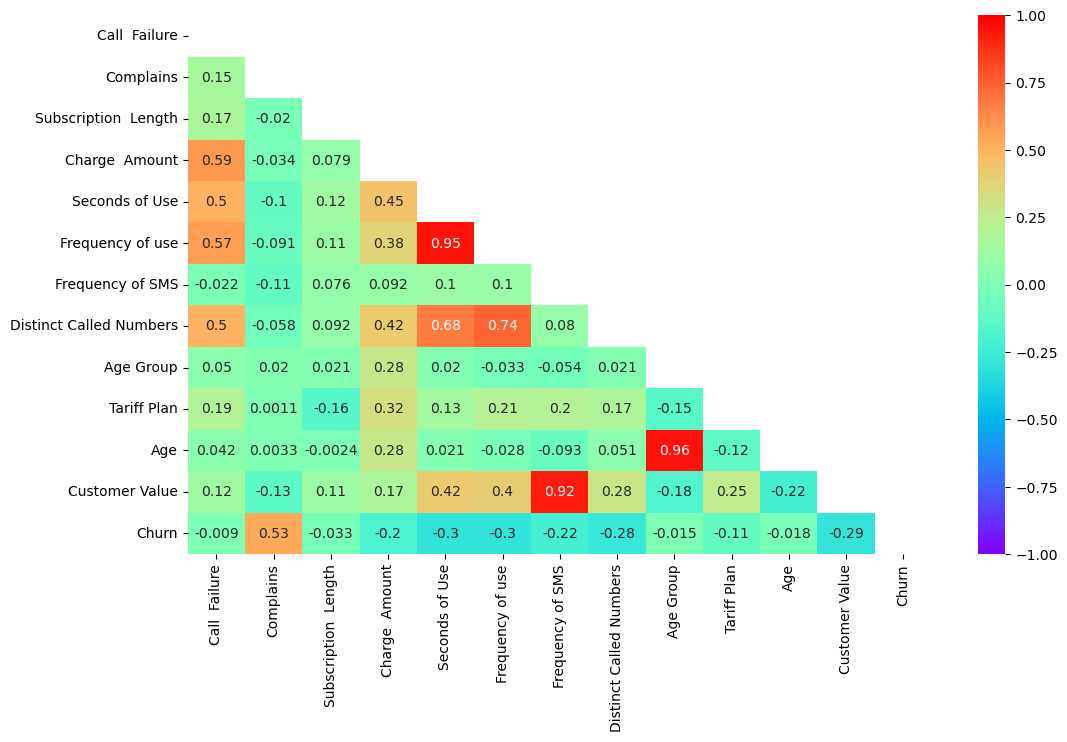

In [6]:
plt.figure(figsize=(12,7))
sns.heatmap(df.corr(),annot=True,vmax=1,vmin=-1,cmap='rainbow',mask=np.triu(df.corr()))

# Univariate Analysis

In [7]:
df.columns

Index(['Call  Failure', 'Complains', 'Subscription  Length', 'Charge  Amount',
       'Seconds of Use', 'Frequency of use', 'Frequency of SMS',
       'Distinct Called Numbers', 'Age Group', 'Tariff Plan', 'Age',
       'Customer Value', 'Churn'],
      dtype='object')

In [8]:
cat_cols=['Complains','Charge  Amount','Age Group','Tariff Plan', 'Age','Churn']

In [9]:
df['Age'].value_counts()

Age
30    1425
25    1037
45     395
55     170
15     123
Name: count, dtype: int64

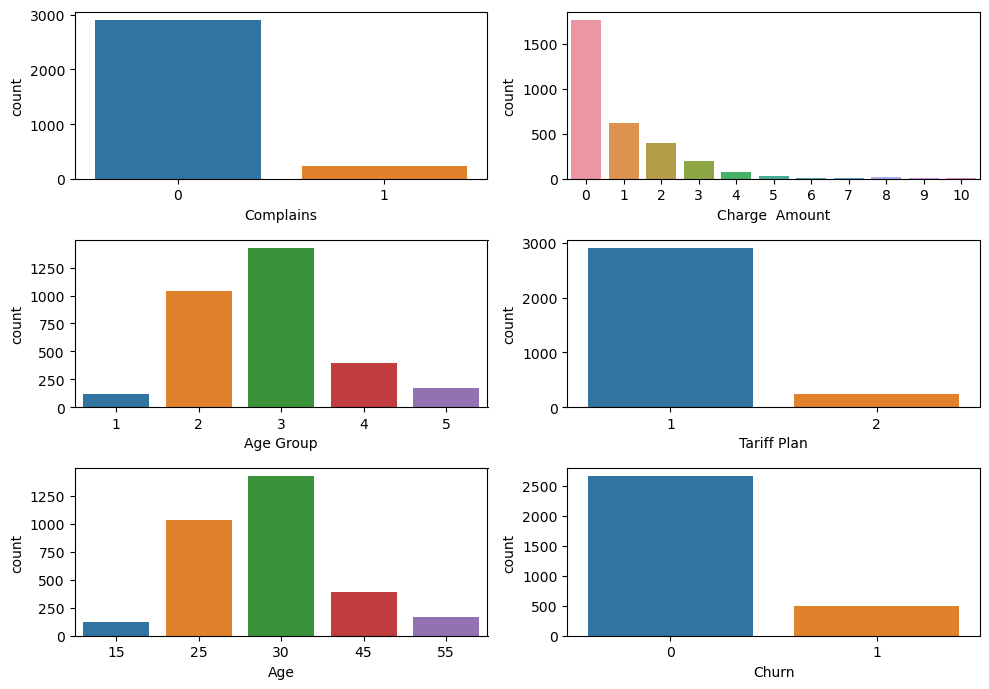

In [10]:
t=1
plt.figure(figsize=(10,7))
for i in cat_cols:
    plt.subplot(3,2,t)
    sns.countplot(x=df[i])
    t+=1
plt.tight_layout()
plt.show()

In [11]:
num_cols=df.drop(columns=cat_cols).columns

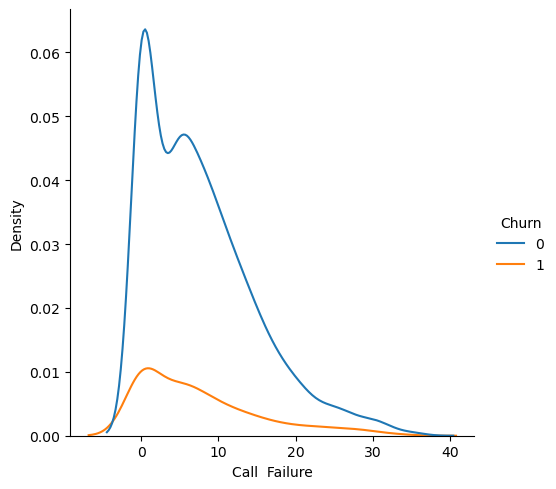

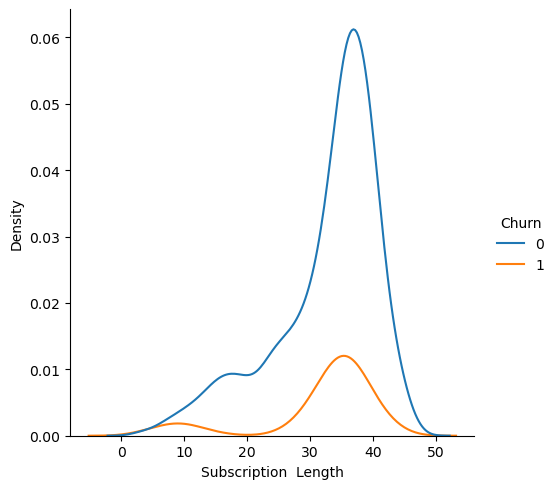

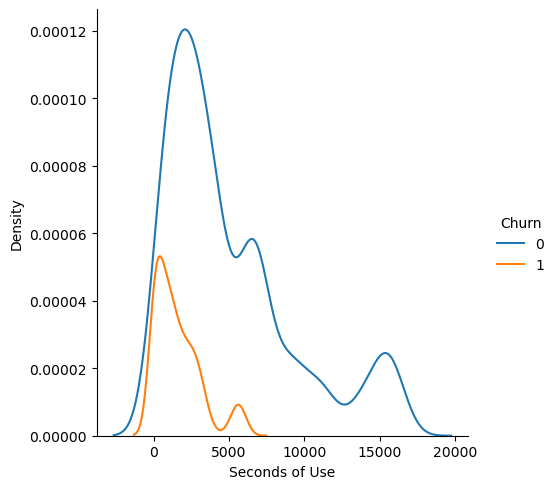

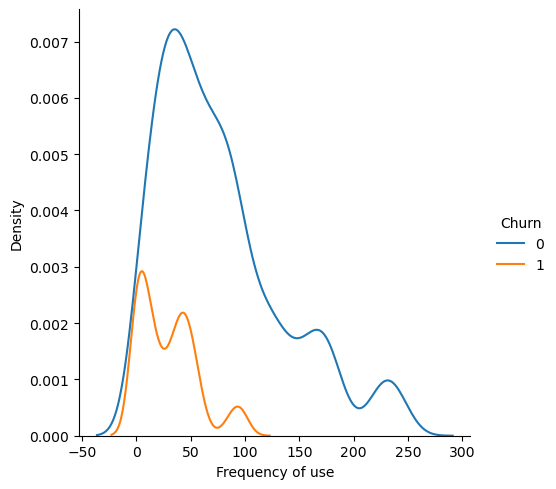

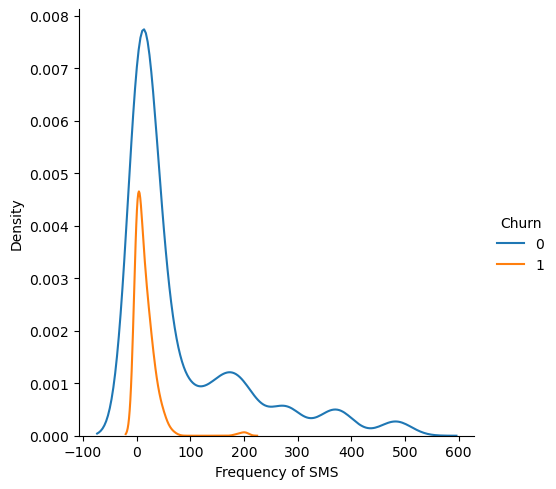

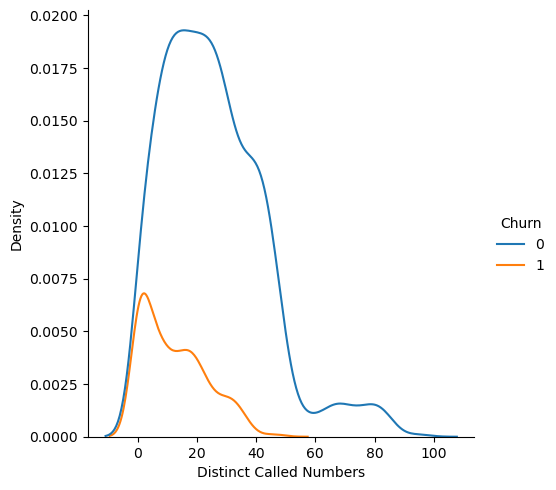

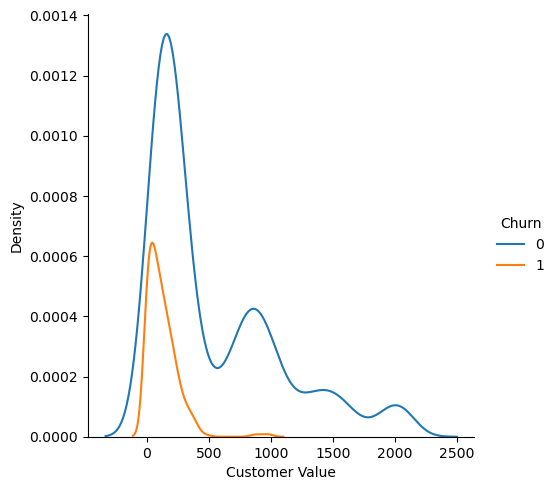

In [12]:

for i in num_cols:
    sns.displot(x=df[i],kind='kde',hue=df['Churn'])
    plt.show()
    

<Axes: xlabel='Complains'>

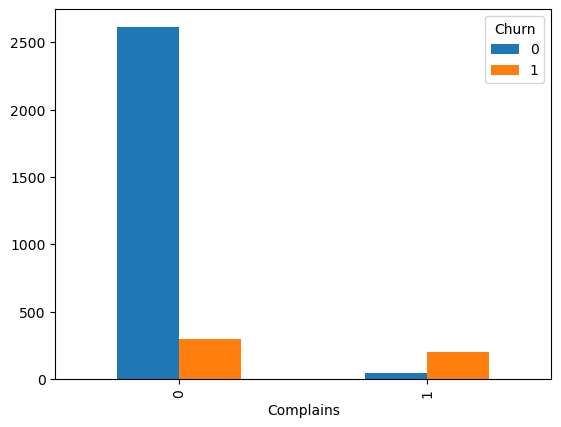

In [13]:
pd.crosstab(df['Complains'],df['Churn']).plot(kind='bar')

<Axes: xlabel='Charge  Amount'>

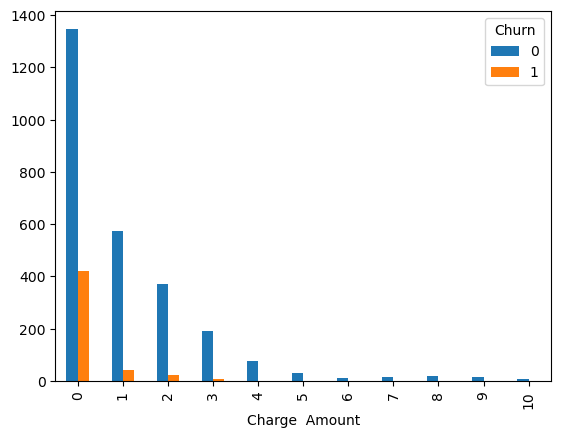

In [14]:
pd.crosstab(df['Charge  Amount'],df['Churn']).plot(kind='bar')

In [15]:
43/574

0.07491289198606271

# Defects in data

In [16]:
df.isnull().sum()

Call  Failure              0
Complains                  0
Subscription  Length       0
Charge  Amount             0
Seconds of Use             0
Frequency of use           0
Frequency of SMS           0
Distinct Called Numbers    0
Age Group                  0
Tariff Plan                0
Age                        0
Customer Value             0
Churn                      0
dtype: int64

In [17]:
df[df.duplicated()]

,Call Failure,Complains,Subscription Length,Charge Amount,Seconds of Use,Frequency of use,Frequency of SMS,Distinct Called Numbers,Age Group,Tariff Plan,Age,Customer Value,Churn
518,0,0,37,0,0,0,0,0,2,1,25,0.00,1
628,0,0,35,0,0,0,0,0,2,1,25,0.00,1
718,0,0,37,0,0,0,0,0,2,1,25,0.00,1
728,0,0,36,0,0,0,0,0,3,1,30,0.00,1
901,0,0,38,0,0,0,0,0,2,1,25,0.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3145,21,0,19,2,6697,147,92,44,2,2,25,721.98,0
3146,17,0,17,1,9237,177,80,42,5,1,55,261.21,0
3147,13,0,18,4,3157,51,38,21,3,1,30,280.32,0
3148,7,0,11,2,4695,46,222,12,3,1,30,1077.64,0


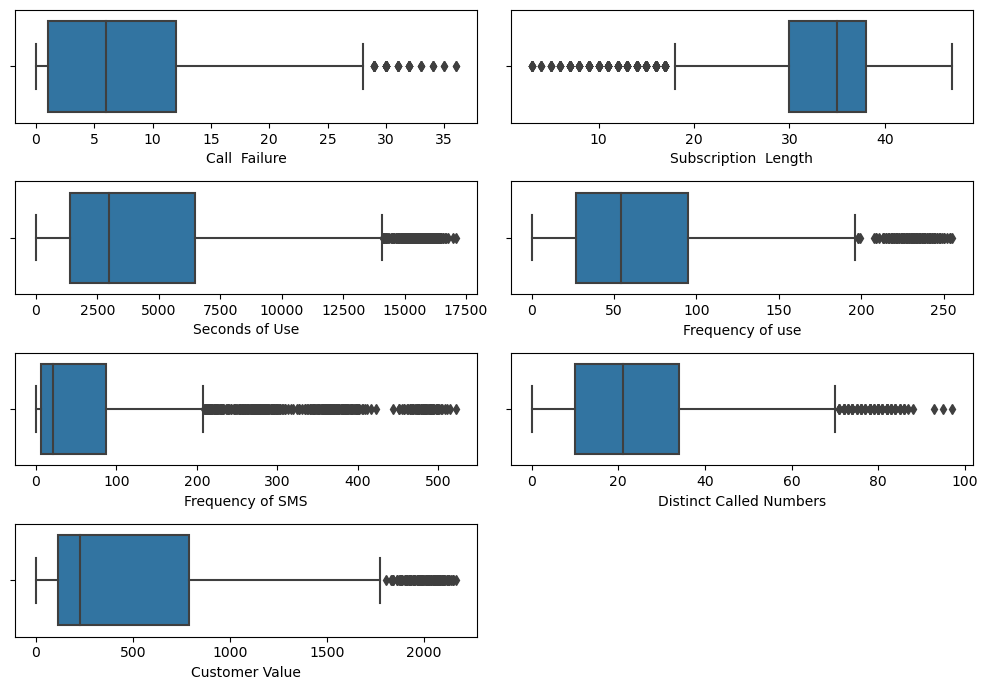

In [18]:
#outliers in num cols
t=1
plt.figure(figsize=(10,7))
for i in num_cols:
    plt.subplot(4,2,t)
    sns.boxplot(x=df[i])
    t+=1
plt.tight_layout()
plt.show()

In [19]:
# As we do not want to loose any row(specially with churn 1).lets cap these outlier

In [20]:
for i in num_cols:
    c_1,c_99=df[i].quantile([0.01,0.99])
    df[i]=np.where(df[i]>c_99,c_99,df[i])
    df[i]=np.where(df[i]<c_1,c_1,df[i])

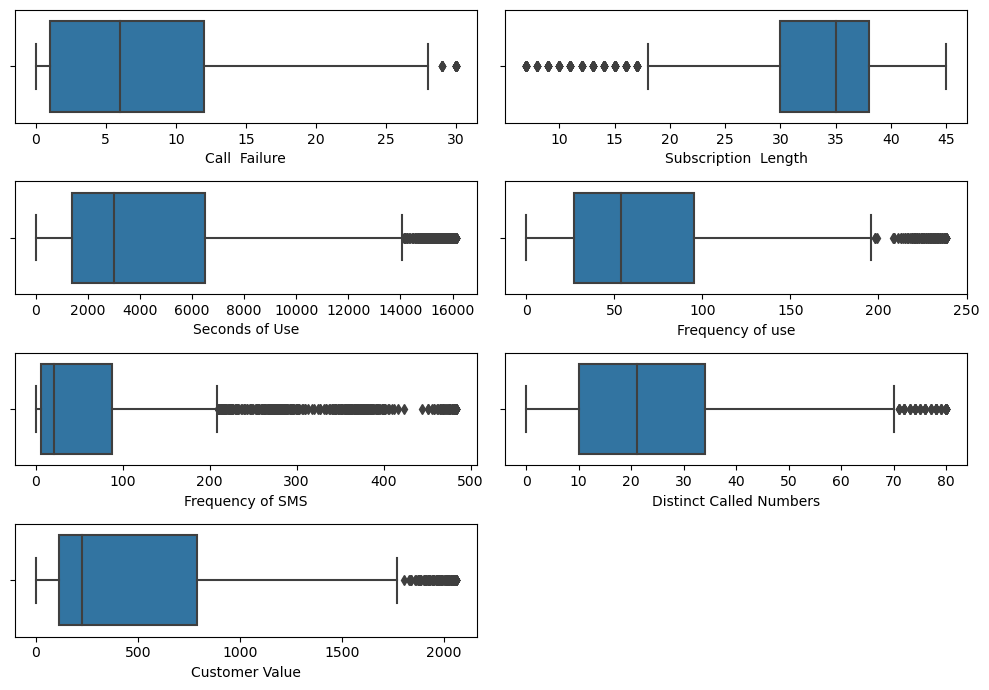

In [21]:
t=1
plt.figure(figsize=(10,7))
for i in num_cols:
    plt.subplot(4,2,t)
    sns.boxplot(x=df[i])
    t+=1
plt.tight_layout()
plt.show()

In [22]:
df.head()

,Call Failure,Complains,Subscription Length,Charge Amount,Seconds of Use,Frequency of use,Frequency of SMS,Distinct Called Numbers,Age Group,Tariff Plan,Age,Customer Value,Churn
0,8.0,0,38.0,0,4370.0,71.0,5.0,17.0,3,1,30,197.640,0
1,0.0,0,39.0,0,318.0,5.0,7.0,4.0,2,1,25,46.035,0
2,10.0,0,37.0,0,2453.0,60.0,359.0,24.0,3,1,30,1536.520,0
3,10.0,0,38.0,0,4198.0,66.0,1.0,35.0,1,1,15,240.020,0
4,3.0,0,38.0,0,2393.0,58.0,2.0,33.0,1,1,15,145.805,0


# Logistic Regression

In [23]:
x=df.drop(columns=['Churn'])
y=df['Churn']
model1=sma.Logit(y,sma.add_constant(x)).fit()
model1.summary()

Optimization terminated successfully.
         Current function value: 0.228076
         Iterations 10


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 3150
Model:                          Logit   Df Residuals:                     3137
Method:                           MLE   Df Model:                           12
Date:                Thu, 14 Dec 2023   Pseudo R-squ.:                  0.4756
Time:                        13:06:22   Log-Likelihood:                -718.44
converged:                       True   LL-Null:                       -1369.9
Covariance Type:            nonrobust   LLR p-value:                1.123e-271
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      -0.8347      0.801     -1.042      0.298      -2.405       0.736
Call  Failure               0.1594      0.017      9.396      0.000       0.126       0.193
Complains                   4.2166      0.285     14.797      0.000       3.658       4.775
Subscription  Length       -0.0032      0.009     -0.366      0.714      -0.020       0.014
Charge  Amount             -0.7113      0.114     -6.212      0.000      -0.936      -0.487
Seconds of Use              0.0003      0.000      1.981      0.048    2.83e-06       0.001
Frequency of use           -0.0574      0.008     -7.034      0.000      -0.073      -0.041
Frequency of SMS           -0.0199      0.012     -1.721      0.085      -0.043       0.003
Distinct Called Numbers    -0.0183      0.009     -1.994      0.046      -0.036      -0.000
Age Group                   0.0764      0.281      0.272      0.786      -0.475       0.627
Tariff Plan                 0.5272      0.676      0.780      0.436      -0.798       1.853
Age                        -0.0116      0.030     -0.393      0.694      -0.070       0.046
Customer Value              0.0016      0.003      0.614      0.539      -0.004       0.007
===========================================================================================
"""

In [24]:
# As per this model the significant columns are
model1.pvalues[model1.pvalues<0.05]

Call  Failure              5.664351e-21
Complains                  1.531614e-49
Charge  Amount             5.215958e-10
Seconds of Use             4.763423e-02
Frequency of use           2.009230e-12
Distinct Called Numbers    4.617606e-02
dtype: float64

In [25]:
# Lets check the VIF
vif=[]
for i in range(len(num_cols)):
    vif.append(variance_inflation_factor(x.values,i))
vif

[5.5551513505992,
 1.212731348005424,
 12.295959068096272,
 3.4885976984360934,
 49.476194129352834,
 43.904505930693674,
 61.804137089118264]

In [26]:
for i,name in zip(range(len(num_cols)),num_cols):
    vif=variance_inflation_factor(x.values,i)
    print(name,'-->',vif)

Call  Failure --> 5.5551513505992
Subscription  Length --> 1.212731348005424
Seconds of Use --> 12.295959068096272
Frequency of use --> 3.4885976984360934
Frequency of SMS --> 49.476194129352834
Distinct Called Numbers --> 43.904505930693674
Customer Value --> 61.804137089118264


In [27]:
df.select_dtypes(include=np.number)


,Call Failure,Complains,Subscription Length,Charge Amount,Seconds of Use,Frequency of use,Frequency of SMS,Distinct Called Numbers,Age Group,Tariff Plan,Age,Customer Value,Churn
0,8.0,0,38.0,0,4370.0,71.0,5.0,17.0,3,1,30,197.640,0
1,0.0,0,39.0,0,318.0,5.0,7.0,4.0,2,1,25,46.035,0
2,10.0,0,37.0,0,2453.0,60.0,359.0,24.0,3,1,30,1536.520,0
3,10.0,0,38.0,0,4198.0,66.0,1.0,35.0,1,1,15,240.020,0
4,3.0,0,38.0,0,2393.0,58.0,2.0,33.0,1,1,15,145.805,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3145,21.0,0,19.0,2,6697.0,147.0,92.0,44.0,2,2,25,721.980,0
3146,17.0,0,17.0,1,9237.0,177.0,80.0,42.0,5,1,55,261.210,0
3147,13.0,0,18.0,4,3157.0,51.0,38.0,21.0,3,1,30,280.320,0
3148,7.0,0,11.0,2,4695.0,46.0,222.0,12.0,3,1,30,1077.640,0


In [28]:
x.drop(columns=['Frequency of use'],inplace=True)
num_cols=["Call Failure","Subscription Length","Seconds of Use","Frequency of use",
         "Distinct Called Numbers","Customer Value"]
for i,name in zip(range(len(num_cols)),num_cols):
    vif=variance_inflation_factor(x.values,i)
    print(name,'-->',vif)

Call Failure --> 4.31887446677698
Subscription Length --> 1.1933991787832086
Seconds of Use --> 12.080597867370672
Frequency of use --> 2.6204578297848022
Distinct Called Numbers --> 18.349187236492632
Customer Value --> 60.63749998304807


In [29]:
sma.Logit(y,sma.add_constant(x.drop(columns=['Customer Value']))).fit().prsquared

Optimization terminated successfully.
         Current function value: 0.236228
         Iterations 10


0.4568248190663352

In [30]:
x.drop(columns=['Frequency of SMS'],inplace=True)
num_cols=["Call Failure","Subscription Length","Seconds of Use","Frequency of SMS","Frequency of SMS"
         "Distinct Called Numbers","Customer Value"]
for i,name in zip(range(len(num_cols)),num_cols):
    vif=variance_inflation_factor(x.values,i)
    print(name,'-->',vif)

Call Failure --> 4.3009387061049456
Subscription Length --> 1.1907159982371183
Seconds of Use --> 11.232683519450228
Frequency of SMS --> 2.4502840932937184
Frequency of SMSDistinct Called Numbers --> 4.9065421132345275
Customer Value --> 5.8811125051460165


In [31]:
sma.Logit(y,sma.add_constant(x)).fit().prsquared

Optimization terminated successfully.
         Current function value: 0.236311
         Iterations 10


0.45663250775355513

In [32]:
x.drop(columns=["Distinct Called Numbers"],inplace=True)
num_cols=["Call Failure","Subscription Length","Seconds of Use",
         "Distinct Called Numbers","Customer Value"]
for i,name in zip(range(len(num_cols)),num_cols):
    vif=variance_inflation_factor(x.values,i)
    print(name,'-->',vif)

Call Failure --> 4.0920207270911195
Subscription Length --> 1.189580073716109
Seconds of Use --> 11.228550580143883
Distinct Called Numbers --> 2.4499540153923967
Customer Value --> 3.6702566653145126


In [33]:
sma.Logit(y,sma.add_constant(x)).fit().prsquared

Optimization terminated successfully.
         Current function value: 0.241296
         Iterations 10


0.44517167969076843

In [34]:
df.columns

Index(['Call  Failure', 'Complains', 'Subscription  Length', 'Charge  Amount',
       'Seconds of Use', 'Frequency of use', 'Frequency of SMS',
       'Distinct Called Numbers', 'Age Group', 'Tariff Plan', 'Age',
       'Customer Value', 'Churn'],
      dtype='object')

# Prediction

In [35]:
x=df.drop('Churn',axis=1)
y=df['Churn']

In [36]:
from sklearn.model_selection import train_test_split

In [37]:
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.75,stratify=y,random_state=1)

In [38]:
model_full=LogisticRegression()
model_full.fit(x_train,y_train)

LogisticRegression()

<Axes: ylabel='count'>

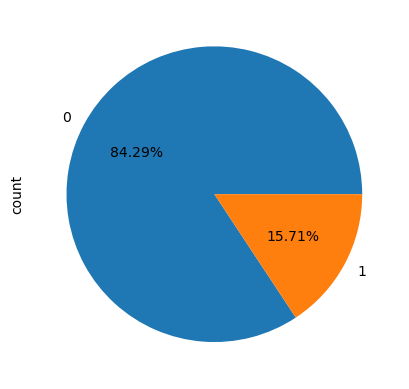

In [39]:
y.value_counts().plot(kind='pie',autopct='%.02f%%')

In [40]:
pred_p=model_full.predict_proba(x_test)[:,1]

In [41]:
pred=np.where(pred_p>0.5,1,0)
pred_p

array([8.88661747e-03, 2.02330210e-01, 6.89094163e-03, 3.81357177e-01,
       4.45480224e-04, 2.91170962e-02, 7.97405960e-03, 1.65974893e-03,
       4.72145902e-01, 3.52707516e-02, 1.94937478e-01, 2.29664054e-03,
       3.72898140e-01, 2.98828276e-01, 2.84901000e-01, 1.75626692e-01,
       3.61791632e-04, 8.96185284e-02, 5.47092155e-01, 1.09091006e-03,
       4.64725384e-02, 3.93551418e-01, 2.59692691e-03, 2.61624225e-04,
       2.31052313e-01, 3.16385430e-01, 3.11159091e-02, 9.34937446e-04,
       8.14628394e-02, 1.02982772e-03, 1.05812222e-01, 1.06146044e-02,
       7.45370619e-03, 4.56124811e-04, 2.02505688e-01, 2.72835584e-01,
       3.94243275e-01, 2.79792609e-02, 1.93621503e-01, 8.26481637e-01,
       2.94055080e-01, 4.03957649e-03, 2.88854153e-01, 6.38822419e-01,
       1.04803510e-03, 4.39786121e-02, 7.26940868e-05, 1.88835838e-01,
       2.35903719e-01, 2.89390775e-03, 4.24336320e-01, 1.64502390e-01,
       3.59358846e-01, 6.47500950e-02, 3.79225791e-02, 5.46738817e-02,
      

In [42]:
from sklearn.metrics import confusion_matrix,cohen_kappa_score,classification_report,roc_auc_score,roc_curve

In [43]:
def validation(actual,pred,pred_prob):
    print(confusion_matrix(actual,pred))
    print(classification_report(actual,pred))
    print(cohen_kappa_score(actual,pred))
    fpr,tpr,thre=roc_curve(actual,pred_prob)
    plt.plot(fpr,tpr)
    plt.plot([0,1],[0,1],color='red')
    plt.show()

[[652  12]
 [105  19]]
              precision    recall  f1-score   support

           0       0.86      0.98      0.92       664
           1       0.61      0.15      0.25       124

    accuracy                           0.85       788
   macro avg       0.74      0.57      0.58       788
weighted avg       0.82      0.85      0.81       788

0.194457064970468


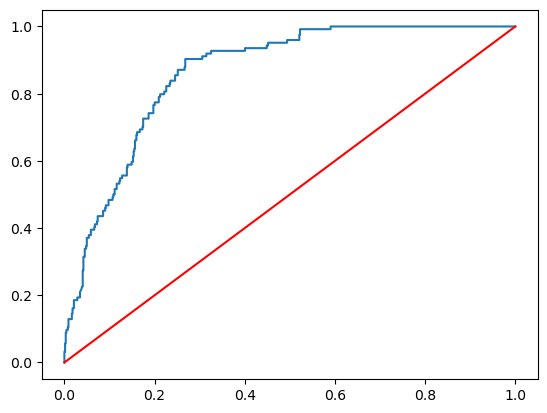

In [44]:
validation(y_test,pred,pred_p)

In [45]:
fpr,tpr,thresh=roc_curve(y_test,pred_p)
pd.DataFrame({'FPR':fpr,'TPR':tpr,'Thresh':thresh,'Yoden Index':tpr-fpr})\
.sort_values(by='Yoden Index',ascending=False)

,FPR,TPR,Thresh,Yoden Index
131,0.268072,0.903226,0.128741,0.635154
132,0.271084,0.903226,0.128661,0.632141
133,0.272590,0.903226,0.128636,0.630635
134,0.275602,0.903226,0.125829,0.627623
127,0.251506,0.870968,0.151007,0.619462
...,...,...,...,...
2,0.000000,0.032258,0.748134,0.032258
3,0.001506,0.032258,0.690753,0.030752
1,0.000000,0.008065,0.826482,0.008065
0,0.000000,0.000000,inf,0.000000


In [46]:
pred_yoden=np.where(pred_p>0.147,1,0)

[[493 171]
 [ 16 108]]
              precision    recall  f1-score   support

           0       0.97      0.74      0.84       664
           1       0.39      0.87      0.54       124

    accuracy                           0.76       788
   macro avg       0.68      0.81      0.69       788
weighted avg       0.88      0.76      0.79       788

0.40671251187734525


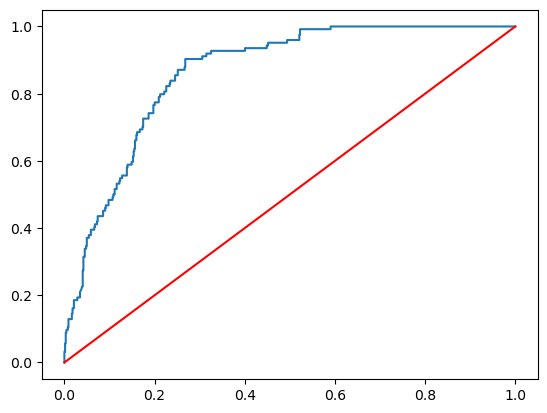

In [47]:
validation(y_test,pred_yoden,pred_p)

In [48]:
pip install -U imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


# Balancing the data

In [49]:
from imblearn.over_sampling import SMOTE

In [50]:
os=SMOTE(sampling_strategy=0.5)

In [51]:
x_train_b,y_train_b = os.fit_resample(x_train,y_train)

In [52]:
y_train.value_counts()

Churn
0    1991
1     371
Name: count, dtype: int64

In [53]:
y_train_b.value_counts()

Churn
0    1991
1     995
Name: count, dtype: int64

In [60]:
model_balanced=LogisticRegression()

In [61]:
model_balanced.fit(x_train_b,y_train_b)

LogisticRegression()

In [54]:
model_full=LogisticRegression()
model_full.fit(x_train_b,y_train_b)

LogisticRegression()

In [74]:
pred_balanced_p = model_balanced.predict_proba(x_test)[:,1]
pred = np.where(pred_balanced>0.5,1,0)

In [70]:
validation(y_test,pred,pred_balanced,pred_balanced_b)

NameError: name 'pred_balanced_b' is not defined

In [75]:
fpr,tpr,thres = roc_curve(y_test,pred_balanced_p)

pd.DataFrame('FPR':fpr,"TPR":tpr,"THRES":thres,"Yodens Index":tpr-fpr).\
sort_values(by="Yodens Index",ascending=False)

SyntaxError: invalid syntax (2328758687.py, line 3)